In [24]:
# Lấy các comment có trường 'cleaned_comment'
comments = [item['cleaned_comment'] for item in data if 'cleaned_comment' in item]

# Lấy 100 comment cuối
last_100_comments = comments[-100:]

# Ghi vào file TXT
with open('data/clear_data/cleaned_comments_last_100.txt', 'w', encoding='utf-8') as f:
    for comment in last_100_comments:
        f.write(comment.strip() + '\n')

In [26]:
import os

# Lấy thư mục làm việc hiện tại (nơi notebook đang chạy)
cwd = os.getcwd()
print("Notebook đang chạy ở thư mục:", cwd)


Notebook đang chạy ở thư mục: /root/study/nam2/hk2/tien_xu_li/Tiki_ABSA/src/models/lstm


In [27]:
import json

input_file = 'data/processed/labeled_data_no_confidence.jsonl'     # File jsonl đầu vào
output_file = 'data/processed/labeled_data_no_confidence.json'    # File json đầu ra

data = []

with open(input_file, 'r', encoding='utf-8') as f:
    for line in f:
        if line.strip():  # Bỏ dòng trống
            data.append(json.loads(line))

with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print(f"Đã chuyển {input_file} thành {output_file}")


Đã chuyển data/processed/labeled_data_no_confidence.jsonl thành data/processed/labeled_data_no_confidence.json


In [34]:
# Đường dẫn đến file JSON
json_path = "data/processed/labeled_data_normalized.json"

# Đọc file
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [35]:
from collections import Counter

label_counter = Counter()

if isinstance(data, list):
    for sample in data:
        for label in sample.get("labels", []):
            label_name = label[-1]  # Nhãn nằm ở vị trí cuối trong list
            label_counter[label_name] += 1
else:
    # Dữ liệu là 1 mẫu duy nhất
    for label in data.get("labels", []):
        label_name = label[-1]
        label_counter[label_name] += 1

# In ra kết quả
for label, count in label_counter.items():
    print(f"{label}: {count}")

Chất lượng sản phẩm#Tích cực: 5954
Chất lượng sản phẩm#Tiêu cực: 1119
Dịch vụ#Tích cực: 2641
Khác#Tích cực: 576
Khác#Tiêu cực: 90
Giá cả#Tiêu cực: 77
Dịch vụ#Tiêu cực: 448
Dịch vụ#Bình thường: 70
Khác#Bình thường: 61
Giá cả#Tích cực: 759
Chất lượng sản phẩm#Bình thường: 426
Giá cả#Bình thường: 57
Khác#Tiêu cưc: 1


In [36]:
import json

# Ánh xạ chuẩn hóa nhãn
label_map = {
    "Khác#Bình Thường": "Khác#Bình thường",
    "Chất lượng#Tích cực": "Chất lượng sản phẩm#Tích cực",
    "Chất lượng sản phẩm#Tích cực": "Chất lượng sản phẩm#Tích cực",
    "Chất lượng#Bình thường": "Chất lượng sản phẩm#Bình thường",
    "Khác#Tiêu cưc": "Khác#Tiêu cực"
    # Thêm các ánh xạ khác nếu cần
}

input_file = 'data/processed/labeled_data_no_confidence.json'
output_file = 'data/processed/labeled_data_normalized.json'

with open(input_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Chuẩn hóa từng nhãn trong từng label
for item in data:
    new_labels = []
    for label in item.get("labels", []):
        if isinstance(label, list) and len(label) == 4:
            raw_label = label[3]
            normalized_label = label_map.get(raw_label.strip(), raw_label.strip())
            label[3] = normalized_label
        new_labels.append(label)
    item["labels"] = new_labels

with open(output_file, 'w', encoding='utf-8') as f:
    json.dump(data, f, ensure_ascii=False, indent=2)

print(f"✅ Đã chuẩn hóa nhãn xong và lưu vào: {output_file}")


✅ Đã chuẩn hóa nhãn xong và lưu vào: data/processed/labeled_data_normalized.json


In [37]:
# Đường dẫn đến file JSON
json_path = "data/processed/labeled_data_normalized.json"

# Đọc file
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

In [38]:
from collections import Counter

label_counter = Counter()

if isinstance(data, list):
    for sample in data:
        for label in sample.get("labels", []):
            label_name = label[-1]  # Nhãn nằm ở vị trí cuối trong list
            label_counter[label_name] += 1
else:
    # Dữ liệu là 1 mẫu duy nhất
    for label in data.get("labels", []):
        label_name = label[-1]
        label_counter[label_name] += 1

# In ra kết quả
for label, count in label_counter.items():
    print(f"{label}: {count}")

Chất lượng sản phẩm#Tích cực: 5954
Chất lượng sản phẩm#Tiêu cực: 1119
Dịch vụ#Tích cực: 2641
Khác#Tích cực: 576
Khác#Tiêu cực: 91
Giá cả#Tiêu cực: 77
Dịch vụ#Tiêu cực: 448
Dịch vụ#Bình thường: 70
Khác#Bình thường: 61
Giá cả#Tích cực: 759
Chất lượng sản phẩm#Bình thường: 426
Giá cả#Bình thường: 57


In [40]:
import json
import random

# Đường dẫn file gốc
input_path = 'data/processed/labeled_data_normalized.json'

# Đường dẫn file đầu ra
train_path = 'data/clear_data/train.json'
dev_path = 'data/clear_data/dev.json'
test_path = 'data/clear_data/test.json'

# Đọc dữ liệu từ file
with open(input_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Trộn ngẫu nhiên dữ liệu để chia đều
random.shuffle(data)

total = len(data)
train_end = int(0.8 * total)
dev_end = train_end + int(0.1 * total)

# Chia dữ liệu
train_data = data[:train_end]
dev_data = data[train_end:dev_end]
test_data = data[dev_end:]

# Ghi ra file
with open(train_path, 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=2)

with open(dev_path, 'w', encoding='utf-8') as f:
    json.dump(dev_data, f, ensure_ascii=False, indent=2)

with open(test_path, 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=2)

print(f'Chia dữ liệu thành công: Train={len(train_data)}, Dev={len(dev_data)}, Test={len(test_data)}')


Chia dữ liệu thành công: Train=3231, Dev=403, Test=405


# ma trận nhầm lẫn

In [41]:
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def draw_confusion_matrix(ground_truth_file, prediction_file, figsize=(10, 8)):
    """
    Vẽ ma trận nhầm lẫn với phương pháp so khớp mềm (soft matching):
    - Ghép nhãn dự đoán đúng nếu có mặt trong nhãn thật.
    - Đếm nhãn bị bỏ sót và nhãn dự đoán thừa.
    
    Parameters:
        ground_truth_file (str): Đường dẫn đến file test.json (ground truth).
        prediction_file (str): Đường dẫn đến file predictions.json.
        figsize (tuple): Kích thước của biểu đồ (chiều rộng, chiều cao).
    """
    # Load dữ liệu ground truth
    with open(ground_truth_file, "r", encoding="utf-8") as f:
        ground_truth_data = json.load(f)

    # Load dữ liệu dự đoán
    with open(prediction_file, "r", encoding="utf-8") as f:
        prediction_data = json.load(f)

    y_true = []
    y_pred = []

    for gt_sample, pred_sample in zip(ground_truth_data, prediction_data):
        gt_labels = [label[3] for label in gt_sample["labels"]]
        pred_labels = [label[3] for label in pred_sample["labels"]]

        temp_pred_labels = pred_labels.copy()

        # Ghép nhãn dự đoán đúng
        for gt_label in gt_labels:
            y_true.append(gt_label)
            if gt_label in temp_pred_labels:
                y_pred.append(gt_label)
                temp_pred_labels.remove(gt_label)
            else:
                y_pred.append("None")  # Không dự đoán được

        # Nhãn dự đoán thừa
        for extra_pred in temp_pred_labels:
            y_true.append("None")  # Không có trong ground truth
            y_pred.append(extra_pred)

    # Danh sách nhãn duy nhất
    all_labels = sorted(set(y_true + y_pred))

    # Tính confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=all_labels)

    # Vẽ
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=all_labels)
    fig, ax = plt.subplots(figsize=figsize)
    disp.plot(ax=ax, xticks_rotation=45, cmap='Blues')
    plt.title("Confusion Matrix (Soft Matching)")
    plt.tight_layout()
    plt.show()


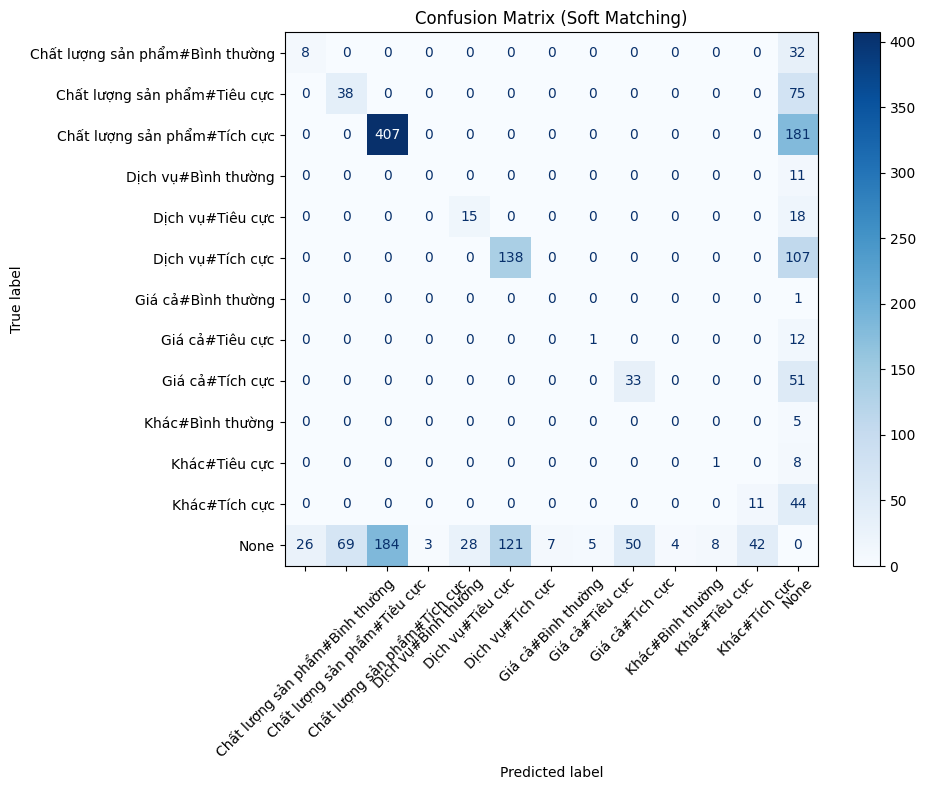

In [42]:
draw_confusion_matrix("data/clear_data/test.json", "checkpoints/LSTM_Model3layer_Wikilingual/predictions.json")


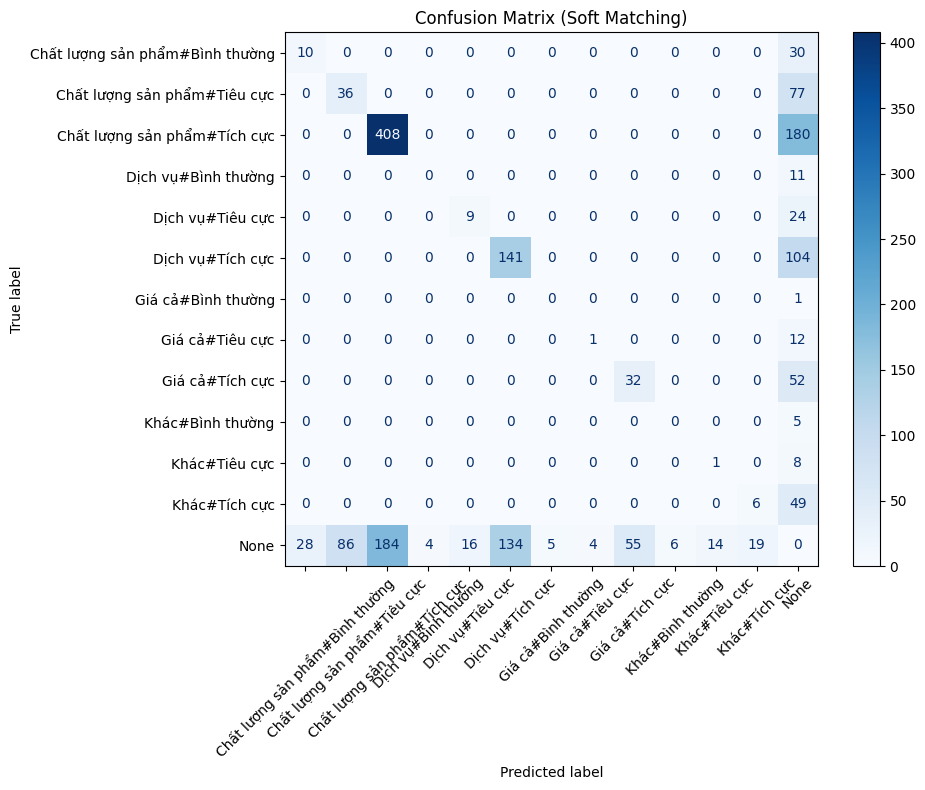

In [43]:
draw_confusion_matrix("data/clear_data/test.json", "checkpoints/BiLSTM_Model3layer_Wikilingual/predictions.json")